In [1]:
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.font_manager as fm
import seaborn as sns
import pyfaidx
import pyBigWig
import logomaker


In [2]:

font_path = "/users/atwang/fonts/Inter/Inter Variable/Inter.ttf"
prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

sns.set(style="white", font=prop.get_name())

In [3]:
fa_path = "/mnt/lab_data2/anusri/chrombpnet/reference/hg38.genome.fa"
bw_path = "/oak/stanford/groups/akundaje/atwang/finemo_gpu_test/K562_PROcap/all_profile_deepshap.bigWig"

hits_path = "/oak/stanford/groups/akundaje/atwang/finemo_gpu_test/K562_PROcap/v10_pp_a_0.6/hits_unique.tsv"
hits_all = (
    pl.scan_csv(hits_path, separator='\t', quote_char=None)
    .select(["chr", "start_untrimmed", "end_untrimmed", "strand", "motif_name", "hit_coefficient"])
)

hit_len = 30

In [4]:
SEQ_ALPHABET = np.array(["A","C","G","T"], dtype="S1")

def one_hot_encode(sequence, dtype=np.int8):
    sequence = sequence.upper()

    seq_chararray = np.frombuffer(sequence.encode('UTF-8'), dtype='S1')
    one_hot = (seq_chararray[None,:] == SEQ_ALPHABET[:,None]).astype(dtype)

    return one_hot


def load_regions(hits, fa_path, bw_path, motif_width):
    num_hits = hits.height

    data = np.zeros((num_hits, 4, motif_width), dtype=np.float16)

    genome = pyfaidx.Fasta(fa_path, one_based_attributes=False)
    bw = pyBigWig.open(bw_path)
    
    for ind, row in enumerate(hits.iter_rows(named=True)):
        chrom = row["chr"]
        start = row["start_untrimmed"]
        end = row["end_untrimmed"]
        strand = row["strand"]
        
        seq = one_hot_encode(genome[chrom][start:end].seq)
        contribs = bw.values(chrom, start, end, numpy=True)
        # print(contribs) ####
        entry = seq * contribs[None,:]

        if strand == "-":
            entry = entry[::-1,::-1]

        data[ind,:,:] = entry

    # print(data) ####
    return data


In [5]:
def filter_hits(hits_all, motif_name):
    hits = (
        hits_all
        .filter(pl.col("motif_name") == motif_name)
        .sort("hit_coefficient", descending=True)
        .collect()
    )
    return hits

In [6]:
def plot_cwm(sequences):
    cwm = np.mean(sequences, axis=0).T

    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111) 

    df = pd.DataFrame(cwm, columns=['A', 'C', 'G', 'T'])
    df.index.name = 'pos'

    crp_logo = logomaker.Logo(df, ax=ax)
    crp_logo.style_spines(visible=False)
    plt.ylim(min(df.sum(axis=1).min(), 0), df.sum(axis=1).max())

    plt.show()
    plt.close()

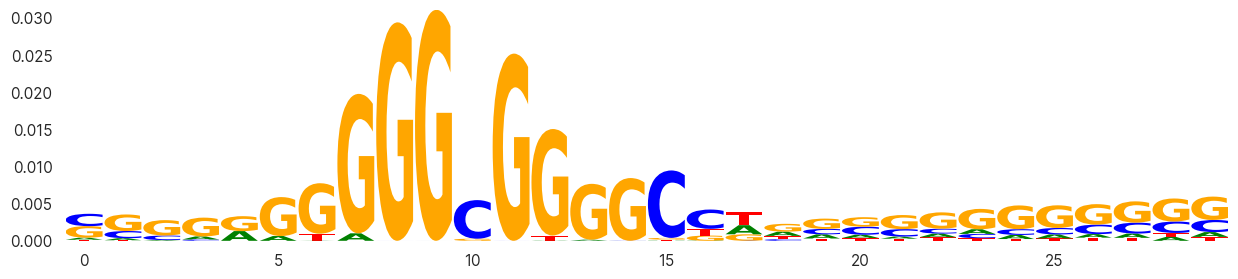

In [7]:
hits = filter_hits(hits_all, "pos_patterns.pattern_0")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

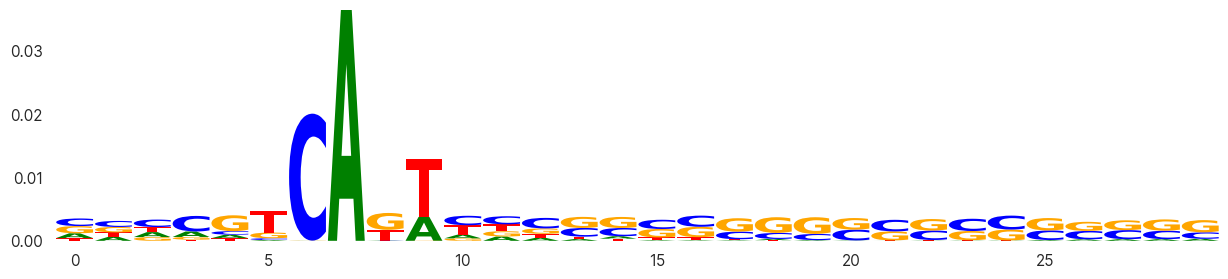

In [8]:
hits = filter_hits(hits_all, "pos_patterns.pattern_1")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

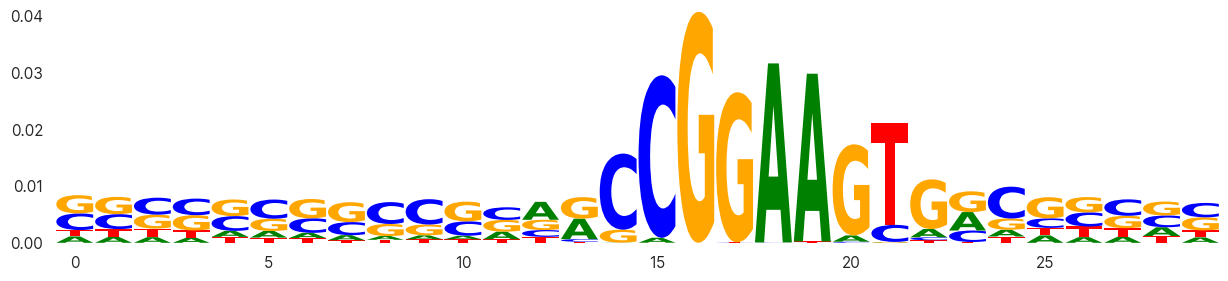

In [9]:
hits = filter_hits(hits_all, "pos_patterns.pattern_2")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

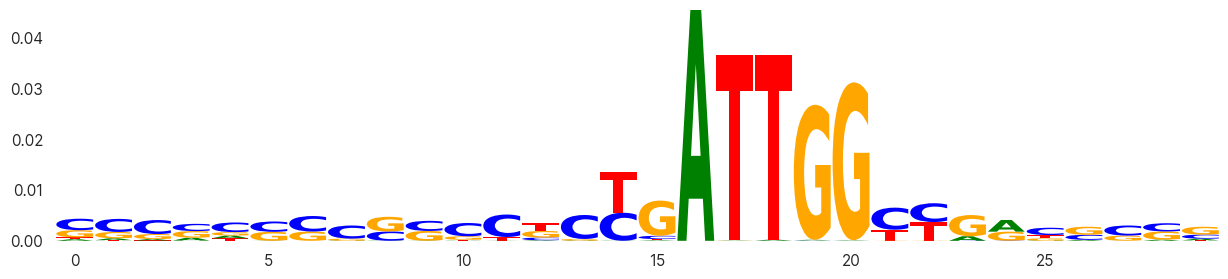

In [10]:
hits = filter_hits(hits_all, "pos_patterns.pattern_3")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

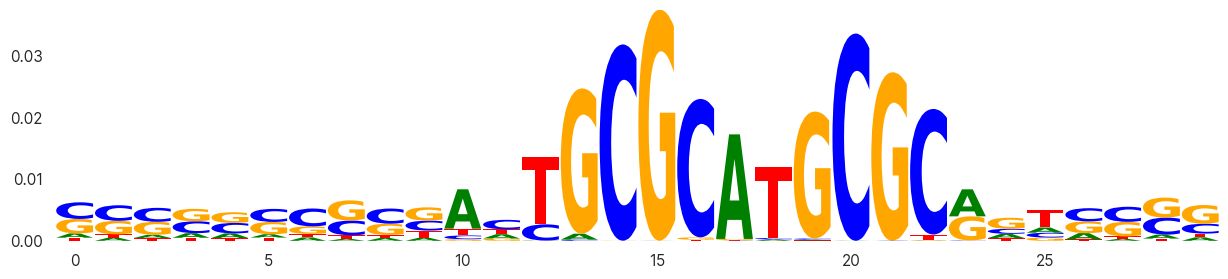

In [11]:
hits = filter_hits(hits_all, "pos_patterns.pattern_4")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

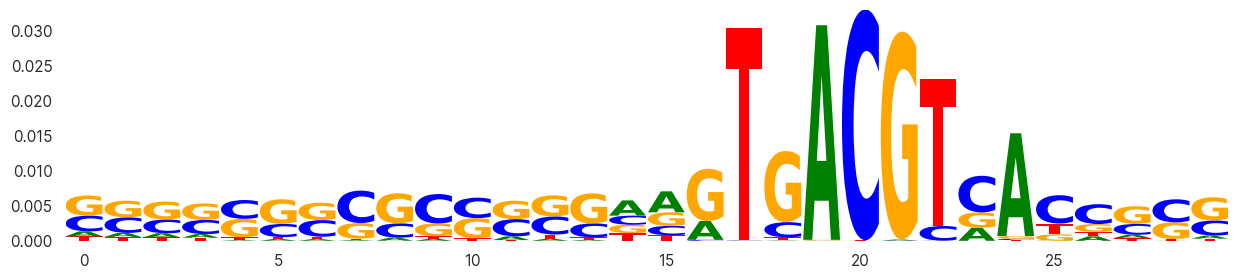

In [12]:
hits = filter_hits(hits_all, "pos_patterns.pattern_5")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

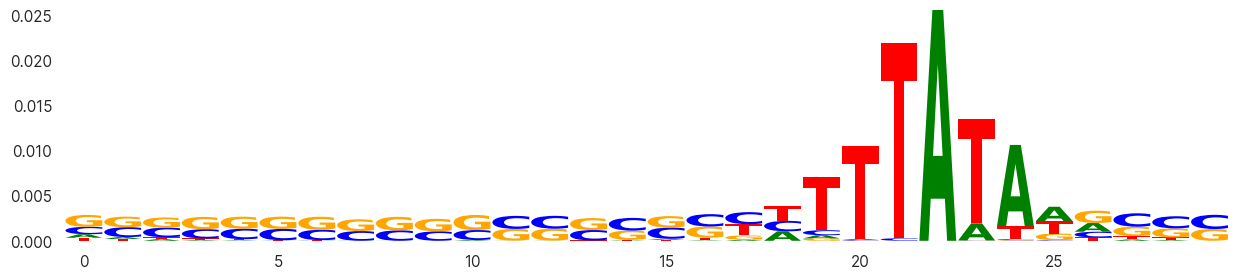

In [13]:
hits = filter_hits(hits_all, "pos_patterns.pattern_6")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

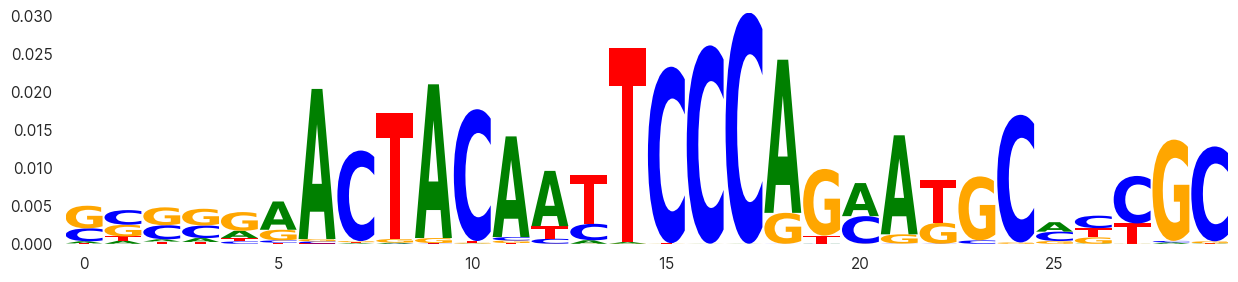

In [14]:
hits = filter_hits(hits_all, "pos_patterns.pattern_7")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

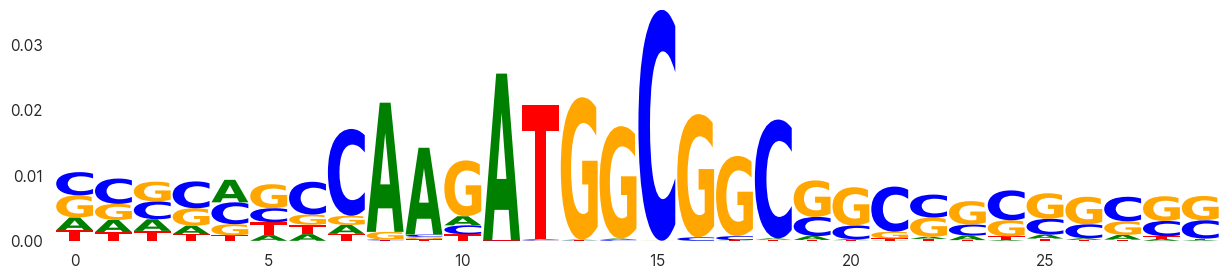

In [15]:
hits = filter_hits(hits_all, "pos_patterns.pattern_8")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

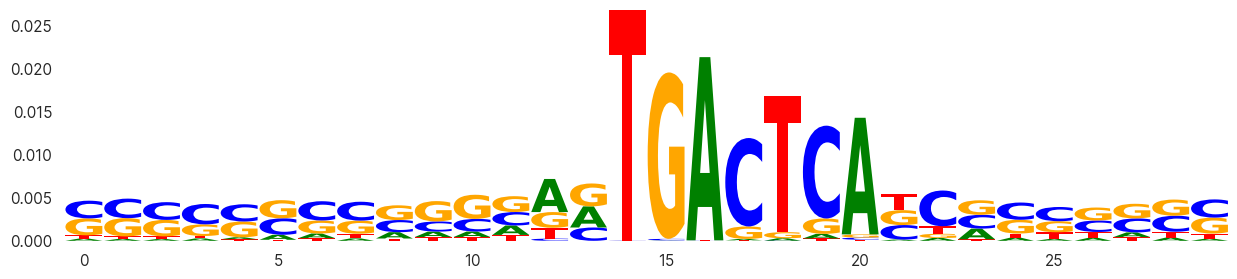

In [16]:
hits = filter_hits(hits_all, "pos_patterns.pattern_9")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

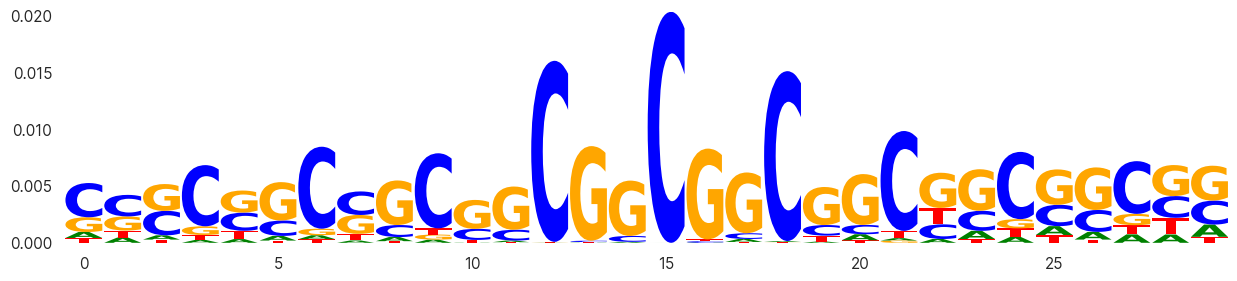

In [17]:
hits = filter_hits(hits_all, "pos_patterns.pattern_10")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

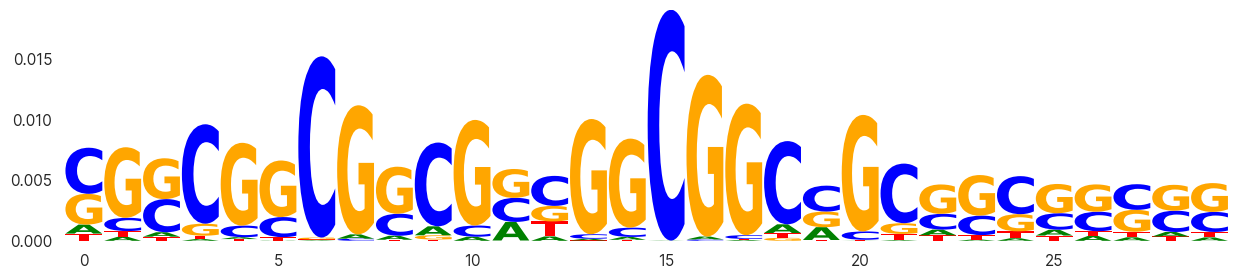

In [18]:
hits = filter_hits(hits_all, "pos_patterns.pattern_11")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

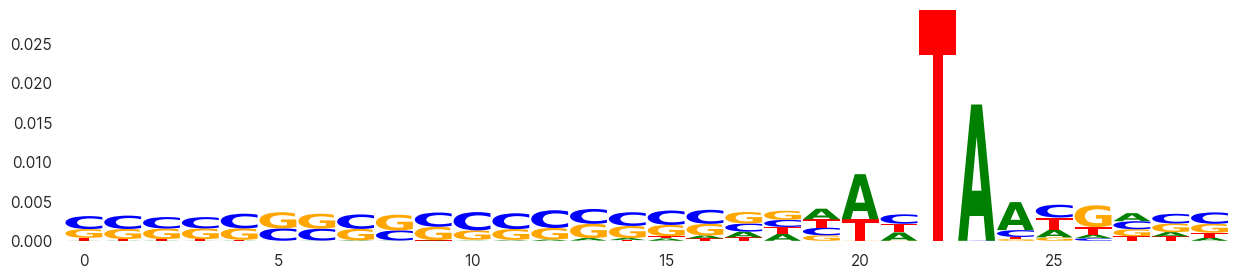

In [19]:
hits = filter_hits(hits_all, "pos_patterns.pattern_13")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

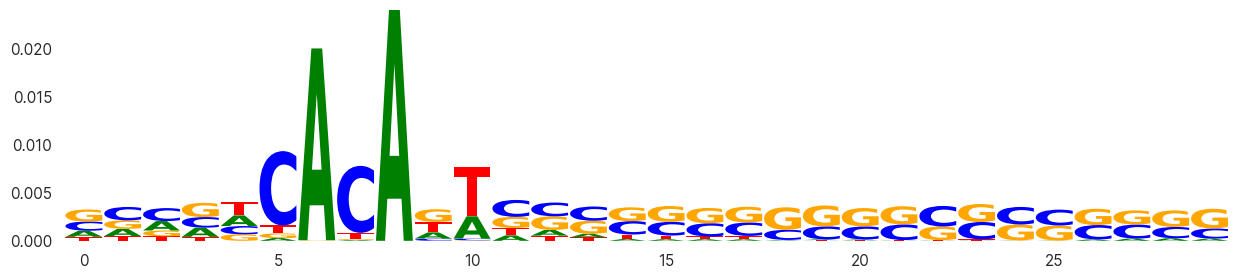

In [20]:
hits = filter_hits(hits_all, "pos_patterns.pattern_28")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

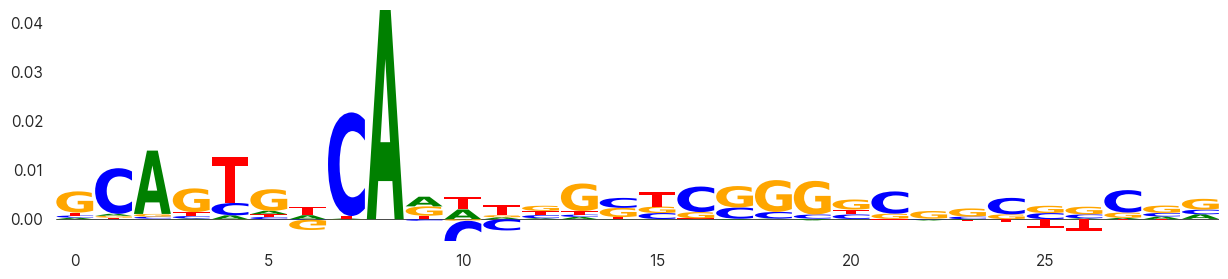

In [21]:
hits = filter_hits(hits_all, "pos_patterns.pattern_34")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

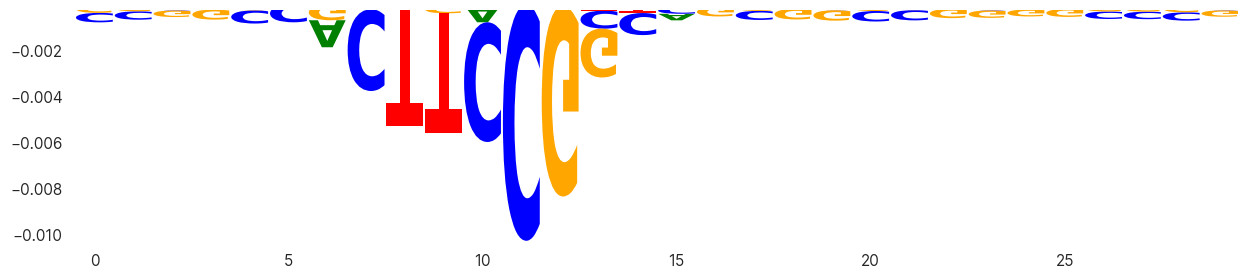

In [22]:
hits = filter_hits(hits_all, "neg_patterns.pattern_1")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)

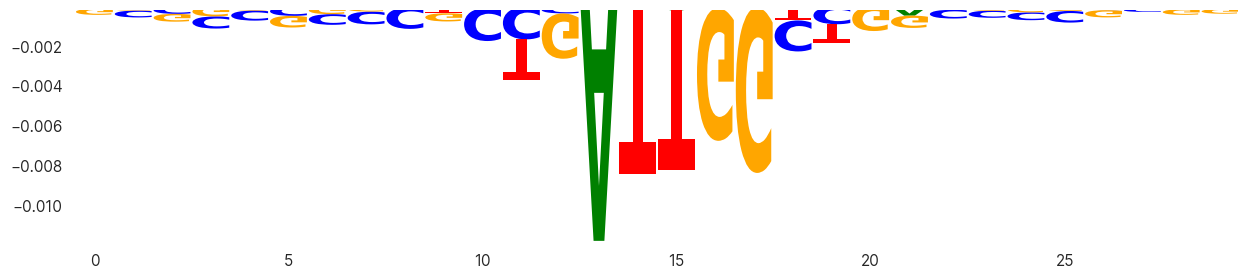

In [23]:
hits = filter_hits(hits_all, "neg_patterns.pattern_2")

sequences = load_regions(hits, fa_path, bw_path, hit_len)
plot_cwm(sequences)